In [116]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [117]:
def VO2max(weight, time, isFemale):  # for male athletes who are trained
    _mins = (time)/60  # pace in minutes
    if isFemale:
        if weight <= 61.36:
            _Y = 14.6 - (1.5 * _mins)
            return (_Y * 1000) / weight
        else:
            _Y = 14.9 - (1.5 * _mins)
            return (_Y * 1000) / (weight)
    else:
        if weight <= 75:
            _Y = 15.1 - (1.5 * _mins)
            return (_Y * 1000) / weight 
        else:
            _Y = 15.7 - (1.5 * _mins)
            return (_Y * 1000) / (weight)


def watts(time):
    _pace = time / 4
    return 2.80/(_pace**3)


def weightAdjustedTime(weight, time):
    _wf = (weight / 122.4699399)**0.222
    return time * _wf

Defining range of weights and times for athletes to complete a 2k erg test in

In [118]:
# numpy array between 40 and 120 in 5kg increments
weight = np.arange(40, 125, 20) # in kg

# time in secs between 5min45sec and 8min in 15sec increments
time = np.arange(345, 480, 15) # in seconds

[Text(0.5, 1.0, 'Weight Adjusted Time vs Weight for Different Times')]

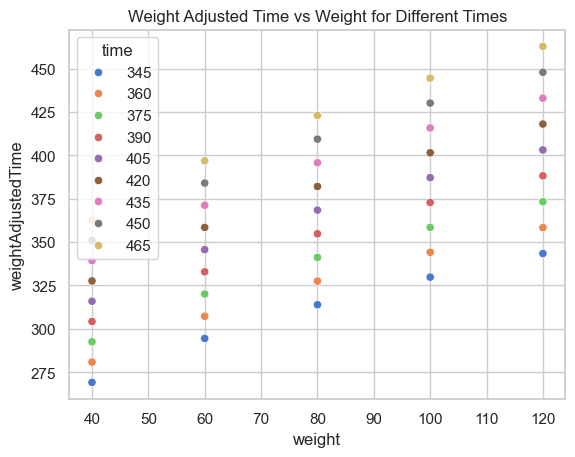

In [119]:
# plot weight adjusted vs weight for different times

# create a list of tuples
data = []
for t in time:
    for w in weight:
        data.append((w, weightAdjustedTime(w, t), t))

# create a dataframe
df = pd.DataFrame(data, columns=['weight', 'weightAdjustedTime', 'time'])

# plot
sns.set(style="whitegrid")
g = sns.scatterplot(x="weight", y="weightAdjustedTime", data=df, hue="time", palette="muted")
# g.set(xlim=(40, 120), ylim=(345, 480))
g.set(title="Weight Adjusted Time vs Weight for Different Times")

1.0
[[-0.40436425]]
[215.71428571]


[Text(0.5, 1.0, 'VO2max vs Weight Adjusted Time for 70kg Athlete')]

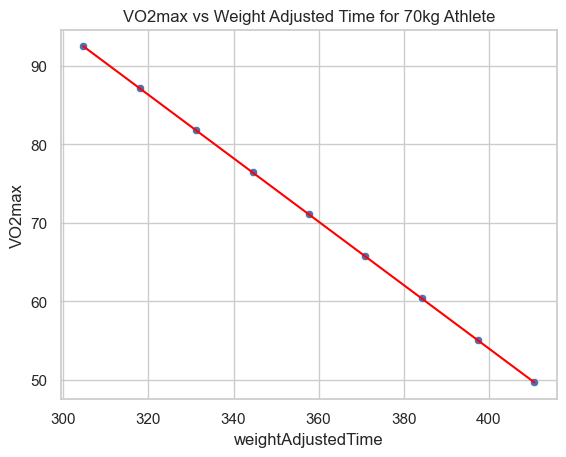

In [120]:
# plot for a 70 kg athelete for different times the VO2max vs weight adjusted time
data = []

for t in time:
    data.append((t, weightAdjustedTime(70, t), VO2max(70, t, isFemale=False)))

df = pd.DataFrame(data, columns=['time', 'weightAdjustedTime', 'VO2max'])

g = sns.scatterplot(x="weightAdjustedTime", y="VO2max", data=df)

# linear regression

X = df['weightAdjustedTime'].values.reshape(-1, 1)
y = df['VO2max'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

g = sns.lineplot(x="weightAdjustedTime", y=reg.predict(X).flatten(), data=df, color='red')
g.set(title="VO2max vs Weight Adjusted Time for 70kg Athlete")

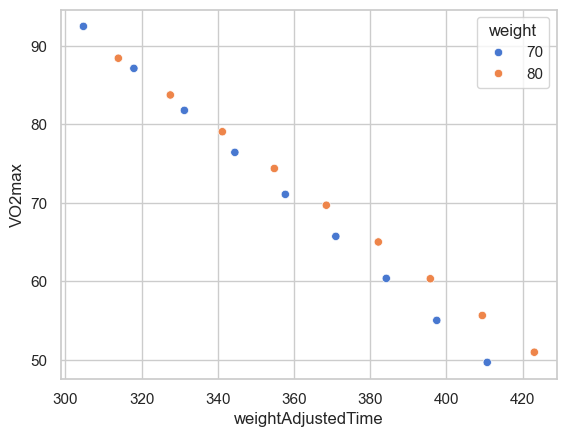

In [121]:
# plot for a 70kg athelete for different times the VO2max vs weight adjusted time and a 80kg athelete for different times the VO2max vs weight adjusted time

data = []

for t in time:
    for w in (70, 80):
        data.append((t, weightAdjustedTime(w, t), VO2max(w, t, isFemale=False), w))

df = pd.DataFrame(data, columns=['time', 'weightAdjustedTime', 'VO2max', 'weight'])

g = sns.scatterplot(x="weightAdjustedTime", y="VO2max", data=df, hue="weight", palette="muted")
        

[Text(0.5, 1.0, 'Weight Adjusted Time vs VO2max for Different Times')]

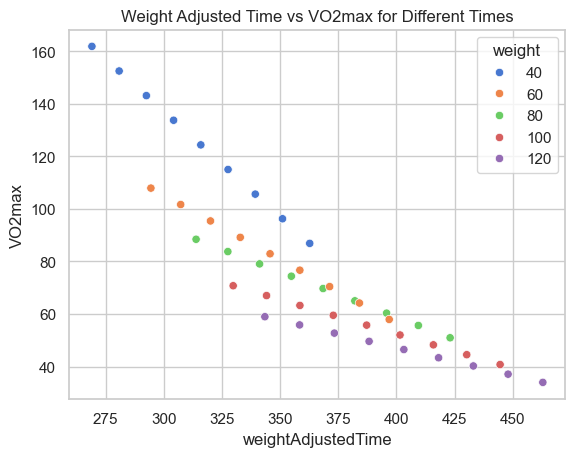

In [122]:
# plot weight adjust vs VO2 max

# create a list of tuples

data = []
for t in time:
    for w in weight:
        data.append((weightAdjustedTime(w, t), VO2max(w, t, isFemale=False), t, w))

# create a dataframe
df = pd.DataFrame(data, columns=['weightAdjustedTime', 'VO2max', 'time', 'weight'])

# plot
sns.set(style="whitegrid")
g = sns.scatterplot(x="weightAdjustedTime", y="VO2max", data=df, hue="weight", palette="muted")

g.set(title="Weight Adjusted Time vs VO2max for Different Times")


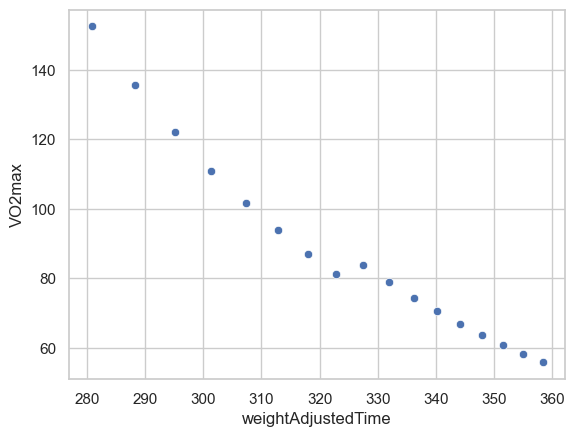

In [127]:
# plot weight adjust vs VO2 max for 6 min 2k at different weights

data = []
for w in np.arange(40, 125, 5):
    data.append((weightAdjustedTime(w, 360), VO2max(w, 360, isFemale=False), w))

df = pd.DataFrame(data, columns=['weightAdjustedTime', 'VO2max', 'weight'])

g = sns.scatterplot(x="weightAdjustedTime", y="VO2max", data=df, legend=False)

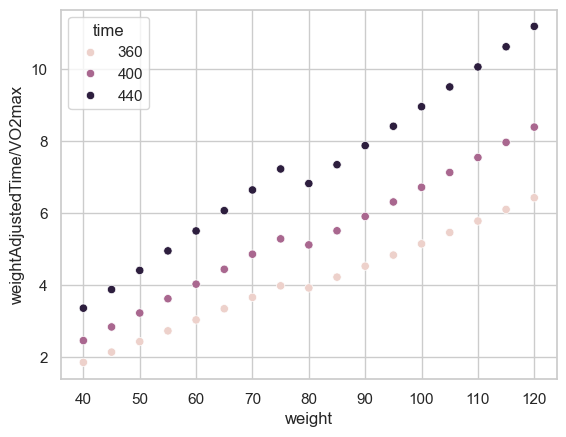

In [132]:
# weight adjusted time (sec) / VO2max vs weight for a 7 min 2k

data = []
for t in np.arange(360, 480, 40):
    for w in np.arange(40, 125, 5):
        data.append((weightAdjustedTime(w, t)/ VO2max(w, t, isFemale=False), w, t))

df = pd.DataFrame(data, columns=['weightAdjustedTime/VO2max', 'weight', 'time'])

g = sns.scatterplot(y="weightAdjustedTime/VO2max", x="weight", data=df, hue='time', legend=True)